**Author : Indumathi Thiyagarajan**

**Title : Assignment 1**

#Package Installation

In [2346]:
import os #helps in interacting with operating system
import numpy as np; np.random.seed(42) #helps performing high level mathematical operations in array. 
import pandas as pd #helps in performing data science and machine learning tasks
import matplotlib.pyplot as plt #helps in data visualization
import seaborn as sns  #helps in highlevel visualisation. Has more default themes

#Data Import and Understanding the Data


In [2347]:
from google.colab import files

uploaded = files.upload()

Saving Automobile_data (1).csv to Automobile_data (1) (21).csv


In [2348]:
#read the data into a desired df name. better to copy and paste from above cell
import io
automobile = pd.read_csv('Automobile_data (1).csv')

In [2349]:
#Know the dimension of the dataframe
automobile.shape

(205, 26)

*Finding: The Dataframe has 205 rows and 26 colums*

In [2350]:
#diplay the head of the data
automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


*Finding: We can clearly see that the null values in this dataset are coded as '?'. So the easiest way i feel is to read the data into datafram by mentioning na_values. This will help us to change all the '?' in the datafram to Nan value.*

In [2351]:
#reading the data again by mentioning null value = ?
automobile = pd.read_csv('Automobile_data (1).csv', na_values='?')

In [2352]:
#diplay the head of the data after replacing '?' to Nan value.
automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,"front,",99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,"front,",105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,"front,",105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,"front,",105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,"front,",99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


*Finding: The ? values are now replaced with Nan*

In [2353]:
#diplay the tail of the data
automobile.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [2354]:
#give the datatype for each column and the number of non-null values in each column
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

*Finding: We can clearly see that there are multiple columns mentioned as object which has to converted to either int or float or category*

In [2355]:
#describe function gives the 5 pointer scale, central tendency measure,min,max and count for all the numeric values
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


*Finding: Now that we have 5 pointer scale, central tendency measure, min, max and count for all the numeric values. We can work on removing outliers and transforming the data.*

#Dealing with Null Values

In [2356]:
#checking for null data. This code gives the sum of all the null values across all columns
automobile.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

*Finding: We found that Normalized-losses column has a 41 null values, bore,stroke,price has 4 null values. horsepower,peakrpm and num of doorshas 2 null values*

##MSNO Matrix- Missing Value Visualization

In [2357]:
#dealing with missing value by installing missingno. 
!pip install missingno
import missingno as msno

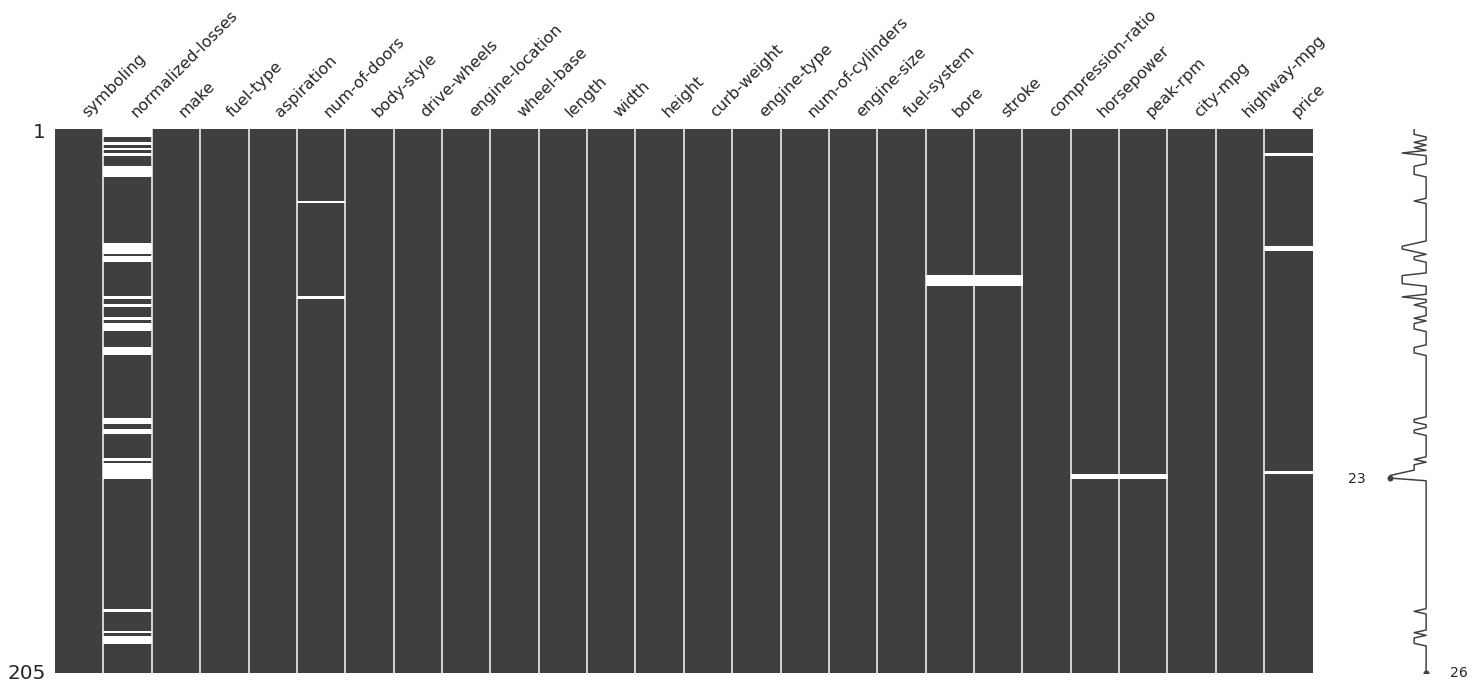

In [2358]:
#Figuring out the missing values position in matrix . This will gives us big picture of the missing value accross the dataframe
msno.matrix(automobile)

*Findings: We can clearly see from the above matrix that the*


>  *NA values are more in the normalized losses.But one thing to note is Bore and Strike column and Horsepeak and peakrpm column has similar missing values*


> *At the peak value, there is missing value in 4 colomns normalized-losses, bore, stroke, horsepower, peak-rpm*

>  *To see if there is any underlying relationship between all the missing variables. Lets build the heat map*




##Replacing the Null Values with Median

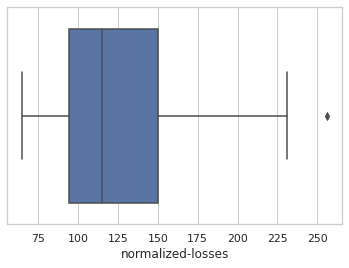

In [2359]:
import seaborn as sns
sns.set_theme(style="whitegrid")
d= sns.boxplot(x=automobile["normalized-losses"])

*Finding: From the Box plot, We can clearly that 25% to 75% of the data are between number 94 and 150 whereas the min and max value is 65 and 135 respectively*
*Since the Nan values in Normalized losses contributes to 20% of the data. I prefer not to drop values. Instead treat it with a central tendency measure values.*


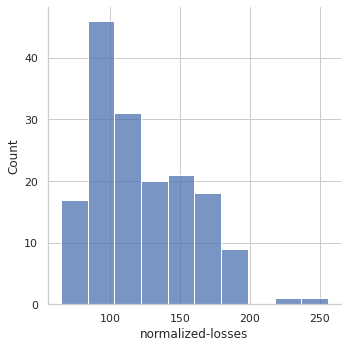

In [2360]:
#looking at the distribution of data. Found that the data is right skewed
import seaborn as sns
sns.displot(automobile, x="normalized-losses")

*Finding :From the distribution plot below, It is clear that the data is right skewed. As it not a symmetric data, I prefer replacing with median instead of mean. * 

In [2361]:
#creating copy of data so we can analyze which strategy suits better
automobile_nldf = automobile.copy(deep=True)

In [2362]:
#Dealing with Missing Values in Normalized scale column
#sklearn is a machinelearning library. Sklearn.preprocessing is used to clean or preprocess data bfore creating models
from sklearn.impute import SimpleImputer 

In [2363]:
#filtering the normalized losses column
automobile_nlarray = automobile_nldf.iloc[:,1:2].values

In [2364]:
#array with only normalized losses values choosing first 5 values
automobile_nlarray[:5]

array([[ nan],
       [ nan],
       [ nan],
       [164.],
       [164.]])

In [2365]:
# we are telling the imputer to find the nan values and replace it with median strategy. verbose defines axis( 0 column, 1 is row )
nl_medianimput= SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)

In [2366]:
#fitting values into their respective place and transform our array to desired shape

nl_imputer = nl_medianimput.fit(automobile_nlarray)
automobile_nl_median = nl_imputer.transform(automobile_nlarray)


In [2367]:
#the null values are transformed into the median value  show first 5 value of numpy array
automobile_nl_median[:5]

array([[115.],
       [115.],
       [115.],
       [164.],
       [164.]])

In [2368]:
#Updating the dataframe with transformed normalized losses value
automobile_nldf['normalized-losses'] = automobile_nl_median

In [2369]:
#we can see that the normalized losses column is updated with the median value and null values are replaced
automobile_nldf.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


*Finding: We have now filled the missing values of Normalized column with Median Values*

##MSNO Heat Map to Visualize Relationship Between Missing Variables

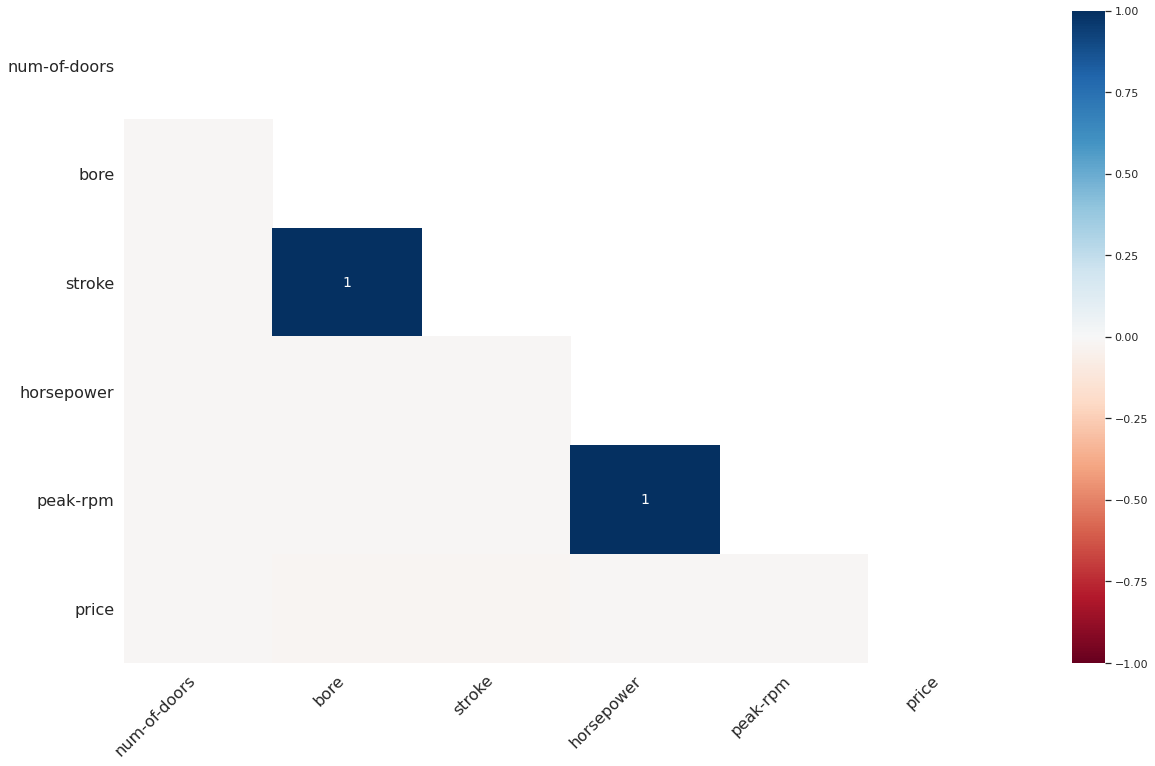

In [2370]:
#Building the heat map to see relationship between missing variables
msno.heatmap(automobile_nldf)

*Finding: Next lets deal with the other columns with Nan values. 
From the heat map we can see*


>*There is a co-relation between stroke and bore*

> *There is a co-relation between horsepower and peak rpm*

*This means that whenever there is an NA value in one variable, the other also seem to have NA value*



##Replacing Missing Values with Mean

*Even though there is a co-relation found in the 4 variables(bore and stroke | horsepower and peak-rpm). The nan values found in the dataset contributes to 0.19%. So I prefer filling up the nan values with Mean values using fill option.* 


In [2371]:
#calculating the mean of all the columns
bore_mean=automobile_nldf['bore'].mean()
stroke_mean=automobile_nldf['stroke'].mean()
horsepower_mean=automobile_nldf['horsepower'].mean()
rpm_mean=automobile_nldf['peak-rpm'].mean()
price_mean=automobile_nldf['price'].mean()

In [2372]:
#filling the null values with mean value from above
automobile_nldf['bore'].fillna(value=bore_mean, inplace=True)
automobile_nldf['stroke'].fillna(value=stroke_mean, inplace=True)
automobile_nldf['horsepower'].fillna(value=horsepower_mean, inplace=True)
automobile_nldf['peak-rpm'].fillna(value=rpm_mean, inplace=True)
automobile_nldf['price'].fillna(value=price_mean, inplace=True)

In [2373]:
#checking if all the above column has null values
automobile_nldf.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

*Finding: We have replaced null values in all the other columns with Mean value.There is one column named num-of-doors with only two missing values with no pattern. I think it is Missed Completely at Random. So we will drop those rows*

##Replacing Missing Value with Drop.Na

*There is one column named num-of-doors with only two missing values with no pattern. I think it is Missed Completely at Random. So we will drop those rows*

In [2374]:
#the num of doors column has only 2 null values. So i prefer dropping it using drop na function
automobile_nldf.dropna(subset=['num-of-doors'], inplace=True, axis=0)

In [2375]:
#checking for the null values in the whole dataframe
automobile_nldf.isnull().sum().sum()
#name the cleaned df as automobile_clean
automobile_clean = automobile_nldf

##Rechecking if all the missing values are replaced with msno matrix

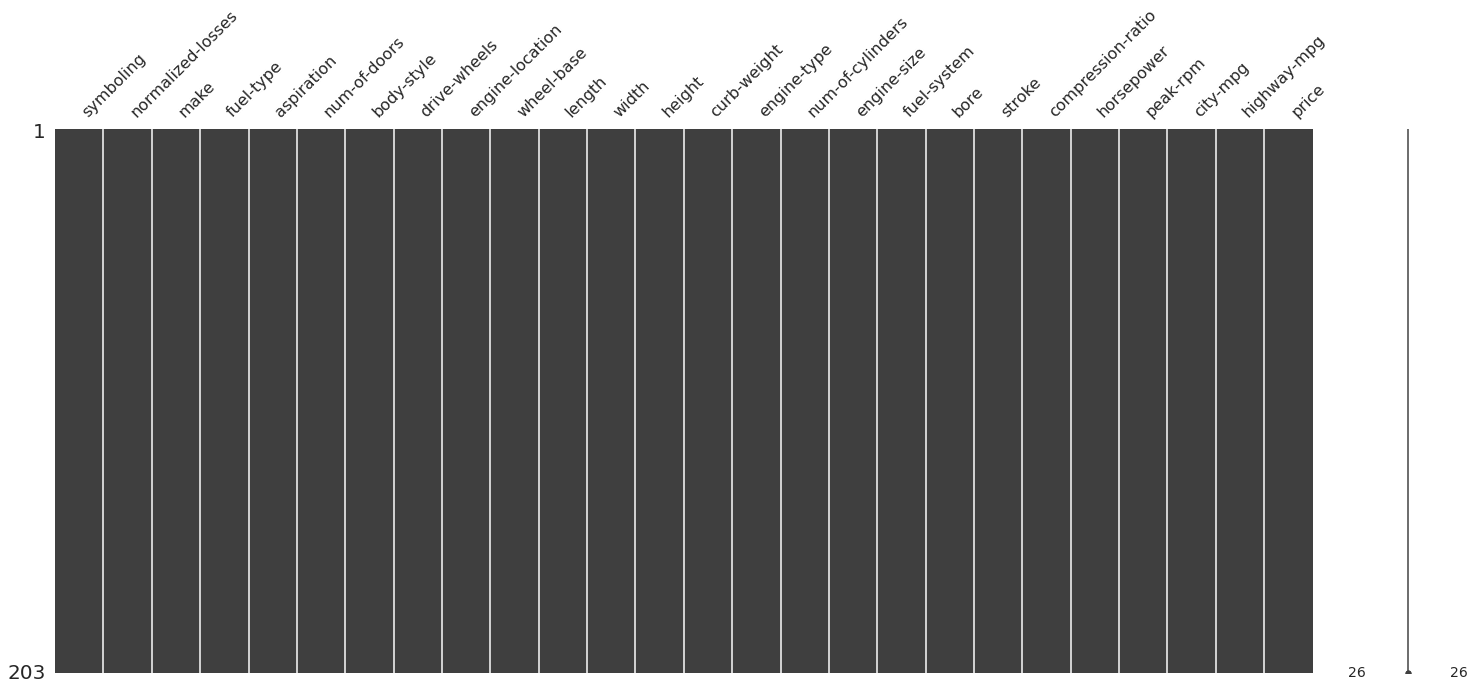

In [2376]:
#after cleaning all the variables, we are checking if there is any missing values through msno matrix
msno.matrix(automobile_clean)

*Findings: All the missing values are now replaced and taken care of*

#Conversion of Data Type

Conversion of Data Type

> Here we convert the datatype of the variables to our desired ones. 

##Converting desired variable to Category

In [2377]:
#converting data type to category for desired variables
cat =['symboling',
"make",
"fuel-type",
"aspiration",
"num-of-doors",
"body-style",
"drive-wheels",
"engine-location",
"engine-type",
"num-of-cylinders",
"fuel-system"
]

automobile_clean[cat]=automobile_clean[cat].astype('category')

##Converting desired variable to Float

In [2378]:
#converting data type to float for desired variables
flt = ["wheel-base",
"length",
"width",
"height",
"bore",
"stroke"
]

automobile_clean[flt] = automobile_clean[flt].astype('float')

##Converting desired variable to Integer

In [2379]:
#converting data type to integer for desired variables
inte = [
"normalized-losses",
"curb-weight",
"horsepower",
"peak-rpm",
"city-mpg",
"highway-mpg",
"price",
"engine-size"]

automobile_clean[inte]=automobile_clean[inte].astype('int')

In [2380]:
#checking the datatype of each column after conversion
automobile_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          203 non-null    category
 1   normalized-losses  203 non-null    int64   
 2   make               203 non-null    category
 3   fuel-type          203 non-null    category
 4   aspiration         203 non-null    category
 5   num-of-doors       203 non-null    category
 6   body-style         203 non-null    category
 7   drive-wheels       203 non-null    category
 8   engine-location    203 non-null    category
 9   wheel-base         203 non-null    float64 
 10  length             203 non-null    float64 
 11  width              203 non-null    float64 
 12  height             203 non-null    float64 
 13  curb-weight        203 non-null    int64   
 14  engine-type        203 non-null    category
 15  num-of-cylinders   203 non-null    category
 16  engine-s

*Findings: We have converted all the variables into integer, float and category. This will help us with further analysis*

#Treating the Spelling error in the data

##Cleaning errors in Engine Location variable

In [2381]:
#I see that engine-location column has a spelling error. So to clean im using this value count code to get all diff names in the column
automobile_clean['engine-location'].value_counts()

front              177
front[location]      5
front,               5
front[engine]        4
font                 4
rear[end]            3
front?               2
front[front]         1
front,front          1
front,               1
Name: engine-location, dtype: int64

*Finding: The engine location column has spelling error with special characters in it. *

In [2382]:
#removing special characters
automobile_clean['engine-location'] = automobile_clean['engine-location'].str.replace('\W', '')


In [2383]:
automobile_clean['engine-location'].value_counts()

front            185
frontlocation      5
font               4
frontengine        4
rearend            3
frontfront         2
Name: engine-location, dtype: int64

In [2384]:
#changing the engine location column to uniform values
automobile_clean['engine-location'] = automobile_clean['engine-location'].str.replace('frontlocation', 'front')
automobile_clean['engine-location'] = automobile_clean['engine-location'].str.replace('font', 'front')
automobile_clean['engine-location'] = automobile_clean['engine-location'].str.replace('frontengine', 'front')
automobile_clean['engine-location'] = automobile_clean['engine-location'].str.replace('frontfront', 'front')
automobile_clean['engine-location'] = automobile_clean['engine-location'].str.replace('rearend', 'rear')

In [2385]:
automobile_clean['engine-location'].value_counts()

front    200
rear       3
Name: engine-location, dtype: int64

*Findings: Now we have only two distinct values in the engine location column*

##Looking for errors in other variable

In [2386]:
automobile_clean['make'].value_counts()

toyota           32
nissan           18
mazda            16
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
mercedes-benz     8
bmw               8
dodge             8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [2387]:
automobile_clean['fuel-type'].value_counts()

gas       184
diesel     19
Name: fuel-type, dtype: int64

In [2388]:
automobile_clean['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [2389]:
automobile_clean['body-style'].value_counts()

sedan          94
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [2390]:
automobile_clean['fuel-system'].value_counts()

mpfi    93
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

##Cleaning Errors in Number of Cylinder variable

In [2391]:
automobile_clean['num-of-cylinders'].value_counts()

four      132
for        25
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

*Finding. There is a spelling error of for instead of four. We should rectify that*

In [2392]:
#we see there is a spelling error. instead of for it should be four
automobile_clean['num-of-cylinders'] = automobile_clean['num-of-cylinders'].str.replace('for', 'four')

In [2393]:
automobile_clean['num-of-cylinders'].value_counts()

four      157
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

*Now the spelling error in number of cylinder column has been rectified*

##Cleaning Errors in Drive Wheels variable

In [2394]:
automobile_clean['drive-wheels'].value_counts()

fwd    118
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

*Finding: The drive wheels column has forward column misspelled as 4wd.*

In [2395]:
#we see there is a spelling error. instead of 4wd it should be fwd
automobile_clean['drive-wheels'] = automobile_clean['drive-wheels'].str.replace('4wd', 'fwd')


In [2396]:
automobile_clean['drive-wheels'].value_counts()

fwd    127
rwd     76
Name: drive-wheels, dtype: int64

*Findings :All data are now cleaned for spelling errors*


#Exploratory Analysis

*Now that all the data are cleaned and missing values are treated. Now lets explore the data*

##Finding the distinct values in the column along with the count of automobile associated with it using Value.Count()

In [2397]:
#number of automobiles in gas?
automobile_clean['fuel-type'].value_counts()

gas       184
diesel     19
Name: fuel-type, dtype: int64

*Findings: Maximum number of automobiles in our dataset used gas*

In [2398]:
#most owned automobile brand in our dataset
automobile_clean['make'].value_counts()

toyota           32
nissan           18
mazda            16
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
mercedes-benz     8
bmw               8
dodge             8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

*Findings: Maximum number of automobiles in our dataset are Toyata make. Nearly 32 vehicles*

In [2399]:
#which is the preferred body style?
automobile_clean['body-style'].value_counts()

sedan          94
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

*Findings: Maximum number of automobiles in our dataset are sedan type model*

In [2400]:
#which is the preferred engine type
automobile_clean['engine-type'].value_counts()

ohc      146
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

*Findinds: OHC engine type contributes nearly 3 times the total of other engine types*

In [2401]:
#Here we are grouping the car by make and counting the number of cars with the number of doors in descending. 
automobile_clean.groupby("make")["num-of-doors"].value_counts().sort_values(ascending = False)

make           num-of-doors
toyota         four            18
               two             14
volvo          four            11
peugot         four            11
mazda          two              9
mitsubishi     two              9
subaru         four             9
nissan         four             9
               two              9
volkswagen     four             8
honda          two              8
mazda          four             7
bmw            four             5
audi           four             5
honda          four             5
mercedes-benz  four             5
porsche        two              5
dodge          two              4
plymouth       four             4
dodge          four             4
mitsubishi     four             4
volkswagen     two              4
bmw            two              3
alfa-romero    two              3
mercedes-benz  two              3
plymouth       two              3
saab           four             3
               two              3
subaru         two  

*Findings: Toyota ranks number 1 in our dataset. In the Toyota make the four door model ranks 1st. Followed by Toyota it is volvo*

---



##Finding the mean of desired variable using mean()

In [2402]:
#what is the average highway mpg?
automobile_clean['highway-mpg'].mean()

30.699507389162562

In [2403]:
#Average Price of the Vehicle
automobile_clean['price'].mean()

13241.91133004926

In [2404]:
#what is the average city mpg?
automobile_clean['city-mpg'].mean()

25.17241379310345

In [2405]:
#What is the average price of the automobile in this dataset?
automobile_clean['price'].mean()

13241.91133004926

##Exploring the relationship across variable using GroupBy

In [2406]:
#To get further more details we are looking for the average of horsepower based on the number of cylinder.
automobile_clean[[ "horsepower","num-of-cylinders"]].groupby("num-of-cylinders").mean()

,horsepower
num-of-cylinders,
eight,193.200000
five,122.454545
four,90.821656
six,161.916667
three,48.000000
twelve,262.000000
two,109.500000


*Findings: We can see that the twelve cylinder automobile has more horsepower*

In [2407]:
#Here we are grouping the car by make and counting the number of cars with the number of doors in descending. 
automobile_clean.groupby("engine-type")["engine-location"].value_counts().sort_values(ascending = False)

engine-type  engine-location
ohc          front              146
ohcv         front               13
ohcf         front               12
l            front               12
dohc         front               12
rotor        front                4
ohcf         rear                 3
dohcv        front                1
Name: engine-location, dtype: int64

*Findings: Almost all the engines are in front except the ohcf engine*

---

#Exploration of Columns Through visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc65b6c2050>,
      dtype=object)

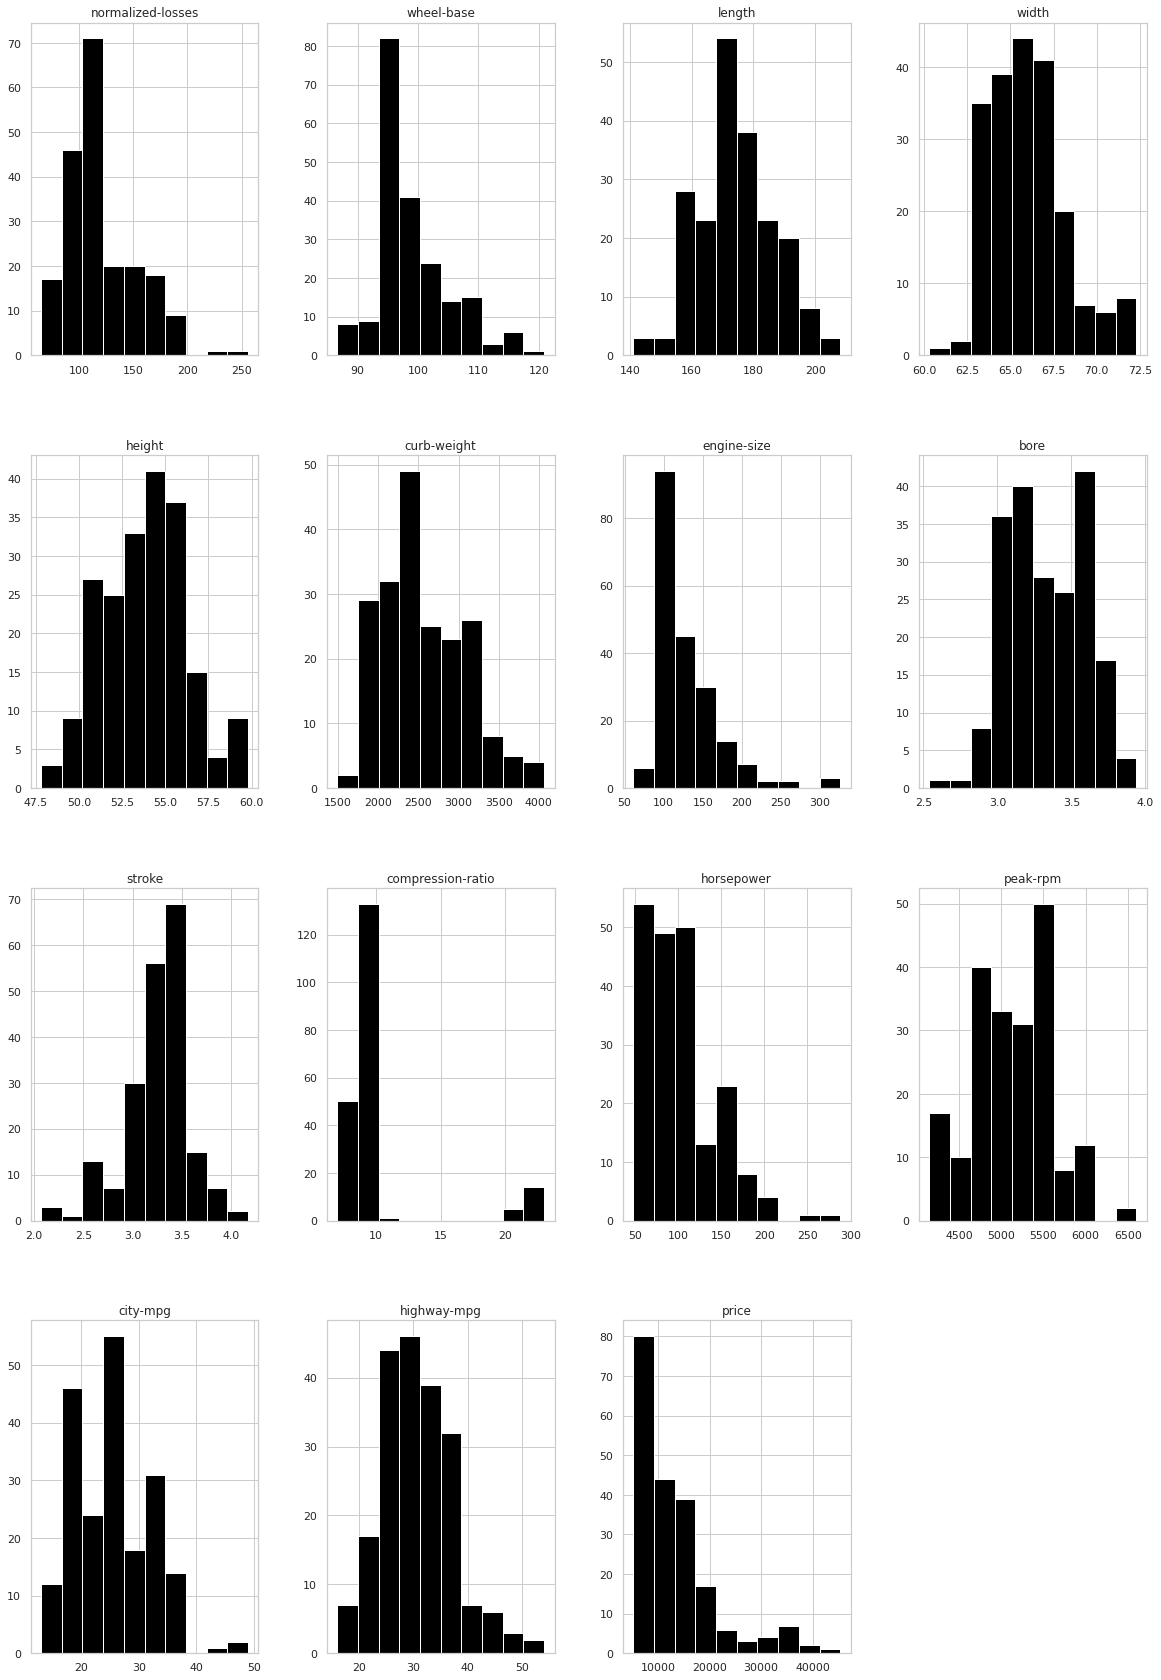

In [2408]:
 #we are plotting histogram for all the variables in our dataframe. As we can see Histogram only plots for numerical data
 automobile_clean.hist(figsize = (20,30),color="black")

*Findings:
From this Histogram plot, the numerical data of the dataset is plotted against count. This Histogram plot also shows us that most of the data are skewed. We can also see that all the numerical data are in different value ranges. So it is essential that we standardize the data value before any machine learning model creation.*

## Visualizing Numeric Data

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:434: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



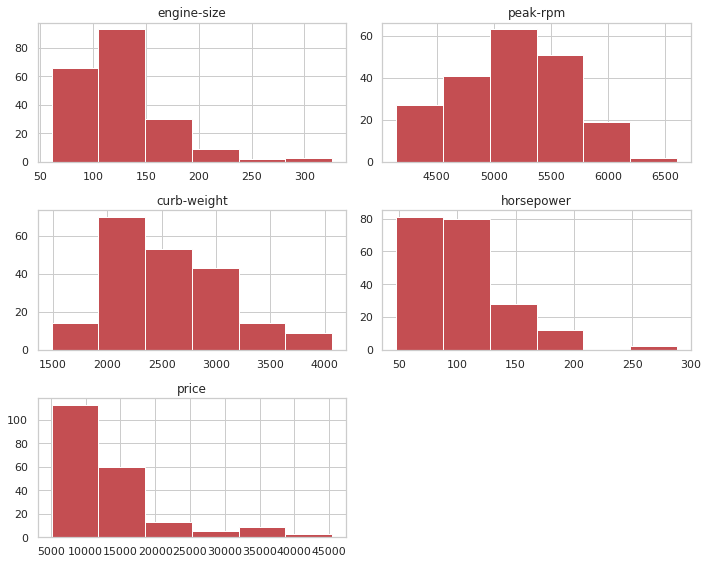

In [2409]:
automobile_clean[['engine-size','peak-rpm','curb-weight','horsepower',"price"]].hist(figsize=(10,8), bins = 6 , color ="R")
plt.tight_layout()
plt.show()

*Findings: Here we are plotting selected variables. This gives us flexibility in choosing the columns that are needed to be seen*

##Visualizing Categorical Data

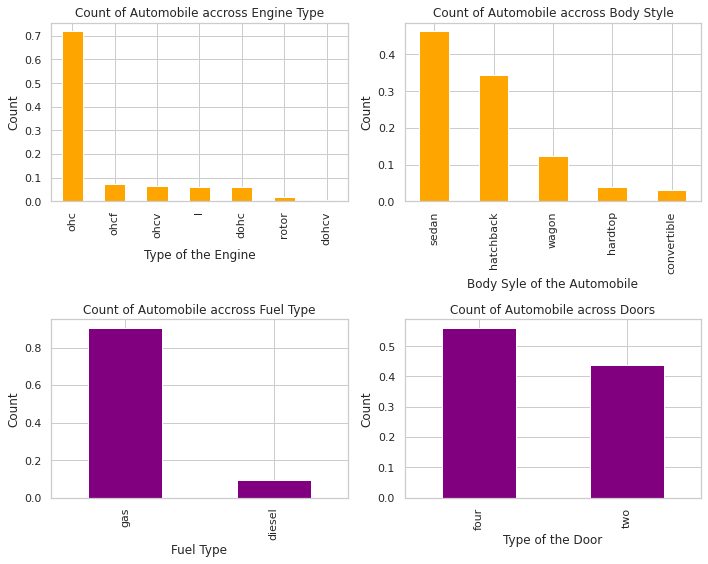

In [2410]:
plt.figure(1)
plt.subplot(221)
automobile_clean['engine-type'].value_counts(normalize = True).plot(figsize=(10,8),kind ='bar', color ='orange')
plt.title("Count of Automobile accross Engine Type")
plt.xlabel('Type of the Engine')
plt.ylabel('Count')

plt.subplot(222)
automobile_clean['body-style'].value_counts(normalize = True).plot(figsize=(10,8),kind ='bar', color ='orange')
plt.title("Count of Automobile accross Body Style")
plt.xlabel('Body Syle of the Automobile')
plt.ylabel('Count')

plt.subplot(223)
automobile_clean['fuel-type'].value_counts(normalize = True).plot(figsize=(10,8),kind ='bar', color ='purple')
plt.title("Count of Automobile accross Fuel Type")
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(224)
automobile_clean['num-of-doors'].value_counts(normalize = True).plot(figsize=(10,8),kind ='bar', color ='purple')
plt.title("Count of Automobile across Doors")
plt.xlabel('Type of the Door')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

*Findings: Here we are plotting the categorical data as before by choosing only the columns that we needed. This plot shows the count in range 0 to 1*

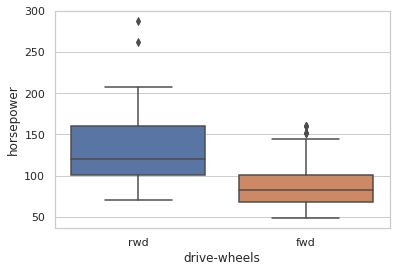

In [2411]:
#Here we are trying to plot box plot

sns.boxplot(y="horsepower",
                x="drive-wheels",
                data=automobile_clean);  

*Findings:We ploted drive wheels against horse power.
We can interpret from the plot that automobiles with rwd wheel has more horsepower*

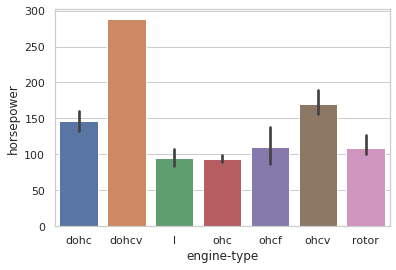

In [2412]:
#Here we are trying to plot barplot against horsepower and engine type
sns.barplot(y="horsepower",
                x="engine-type",
                data=automobile_clean);

*Findings: We infer from the plot that dohvc has more horse power than rest of te engine type of upto 290*

In [2413]:
#Here we are using plotly Express to plot fancy charts

import plotly.express as px
allplot = px.scatter(automobile_clean,
x=automobile_clean["engine-size"],
y=automobile_clean["city-mpg"],
color=automobile_clean["fuel-type"],
facet_col=automobile_clean["body-style"],
facet_row=automobile_clean["engine-location"],
color_discrete_map={"gas": "#ff8c94","diesel": "#F12761"},
width=950,
height=800,
title="Automobile Data")
allplot.update_layout(
plot_bgcolor= "#006F60",
paper_bgcolor="#00ACA5",
)
# Hide grid lines
allplot.update_xaxes(showgrid=False)
allplot.update_yaxes(showgrid=False)
allplot.show()

*Finding: We can infer from this multivariate analysis chart that most of the observations are found in Sedan body type vehicle with front engine location  running in gas fuel. Particularly in this segment, the automobile with low engine size has more city-mpg. This kind of multivariate analysis chart gives broader overview of our dataset*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



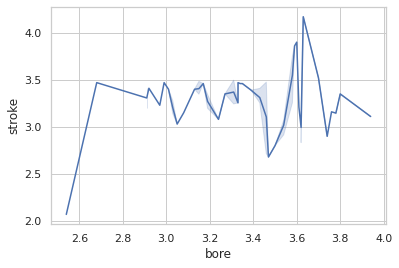

In [2414]:
#we are plotting line plot to see the relationship between bore across stroke. 
sns.lineplot(automobile_clean['bore'],automobile_clean['stroke'])

*Findings:Its surprising to see that stroke value is very high for particular bore value of 3.6 to 3.7. It is interesting how it is very low at 3.4+ range. This explains us how each 0.2 value can make huge difference in stroke.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



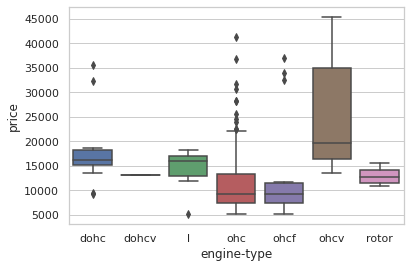

In [2415]:
#we are plotting price with engine type to determine distribution of price across the engine type. 
sns.boxplot(automobile_clean['engine-type'], automobile_clean['price'])

*Findings:We see that automobiles with ohvc engine type are sold at higher price. We also see that few of the ohc vehicles are sold at higher rate. But as the value is greater than 1.5*IQR, its better to check if the engine type variable has outlier*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



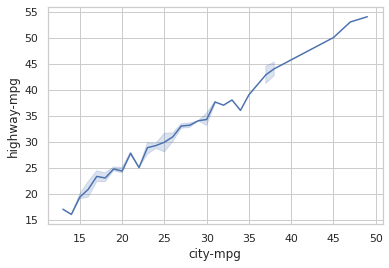

In [2416]:
sns.lineplot(automobile_clean['city-mpg'],automobile_clean['highway-mpg'])

*Findings: From the above line graph, We can see that the city-mpg and highway-mpg has linear relationship. It will be interesting to see how far they are correlated using correlation analysis and linear regression model*

#TRANSFORMATION OF DATA - PERFORMING FEATURE ANALYSIS

##Using Percentile Method to Remove Outliers

##Dealing with outliers

*Outliers are the values that lie entirely out of the Inter Quartile Range. This value differs significantly from other observations. It is essential to deal with the outliers before building any model because an outlier would change the statistical measures of the variable especially the mean of the variable*

looking for summary statistics of the data to see which maximum value is way away from the 75% using describe function. 
from this we are able to see the normalized-losses, cub-weight, engine-size, compression-ration, horsepower, city-rpm,highway-rpm and price are way away from the 75% value. 
I am choosing three variable for this assignment to clean the outlier. 
1.Normalized losses
2.compression-ration
3.price

In [2417]:
#looking for summary statistics of the data to see which maximum value is way away from the 75% using describe function. X

##Dealing the outlier in Normalized losses

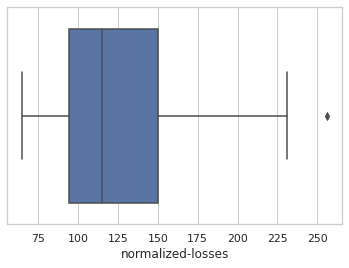

In [2418]:
#Visualizing outlier in box plot
nl_box= sns.boxplot(x=automobile["normalized-losses"])

*Findings:We see the distribution of the data is right skewed. Also there is an outlier present far away from the 1.5*IQR value. Its good to remove the outlier to get optimum result*

Box plot shows there is a outlier value. Let us deal with it using percentile method

In [2419]:
#Calculating the 99% quartile value for the normalized losses column
nl_max_threshold = automobile_clean['normalized-losses'].quantile(0.99)
nl_min_threshold = automobile_clean['normalized-losses'].quantile(0.01)

In [2420]:
#give me value less than max threshold and more than min threshold
automobile_percentile= automobile_clean[(automobile_clean['normalized-losses']<nl_max_threshold) & (automobile_clean['normalized-losses']>nl_min_threshold)]

In [2421]:
#gives the shape num of rows, num of columns before removing outliers
automobile_clean.shape

(203, 26)

In [2422]:
#gives the shape num of rows, num of columns after removing the outliers
automobile_percentile.shape

(194, 26)

### Before Removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



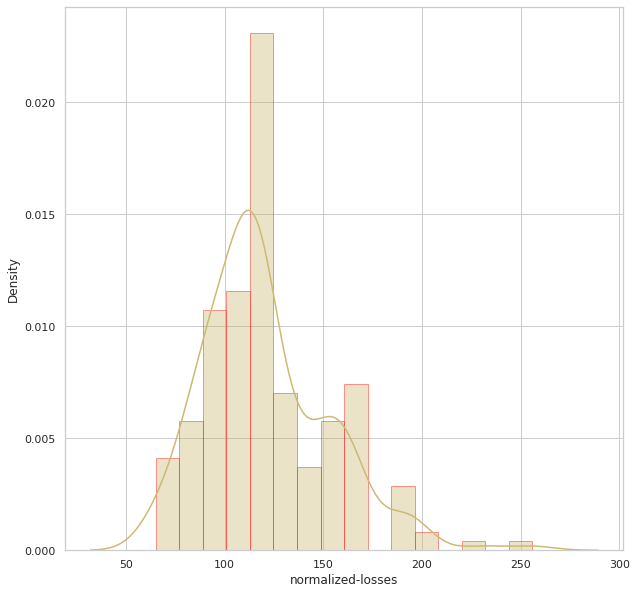

In [2423]:
#Visualizing the distribution before removing outlier
plt.figure(figsize=(10,10))
sns.distplot(automobile_clean['normalized-losses'],hist_kws=dict(edgecolor= "#FF0000"),color ='y')
plt.show()

### After Removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



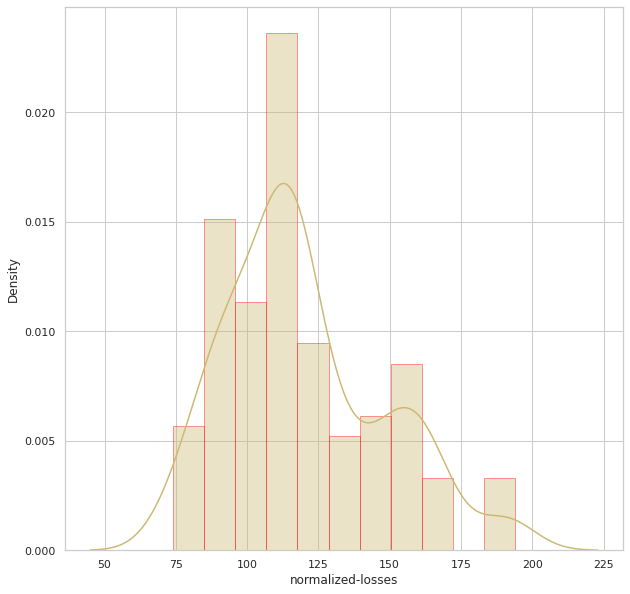

In [2424]:
#Visualizingdistribution after removing outlier using percentile method
plt.figure(figsize=(10,10))
sns.distplot(automobile_percentile['normalized-losses'],hist_kws=dict(edgecolor= "#FF0000"),color ='y')
plt.show()

### Before Removing Outlier

In [2425]:
automobile_clean['normalized-losses'].describe()

count    203.000000
mean     120.492611
std       31.901359
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized-losses, dtype: float64

### After Removing Outlier

In [2426]:
automobile_percentile['normalized-losses'].describe()

count    194.000000
mean     119.865979
std       27.675068
min       74.000000
25%      102.000000
50%      115.000000
75%      134.000000
max      194.000000
Name: normalized-losses, dtype: float64

Findings: 

1. After removing the outlier the shape of the dataframe changed from 203 to 194 rows
2. we can see that the median remains the same, but there is a difference in mean and maximum value.
3. We can also see a clear change of these value change in the distribution plot. 
4. The normalized losses x axis changed from 300 to 225 value. 
The peak value of the curve reached far above 0.015

##Dealing with outliers in price column


Box plot shows there is a outlier value. Let us deal with it using percentile method

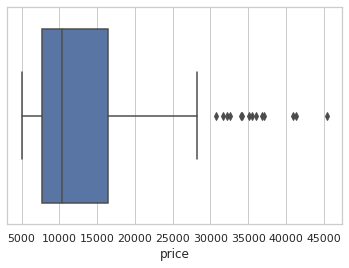

In [2427]:
#Visualizing outlier in box plot
price_box= sns.boxplot(x=automobile["price"])

In [2428]:
#Calculating the 99% quartile value for the normalized losses column
price_max_threshold = automobile_percentile['price'].quantile(0.99)
price_min_threshold = automobile_percentile['price'].quantile(0.01)

In [2429]:
#give me value less than max threshold and more than min threshold
automobile_percentile2 = automobile_percentile[(automobile_percentile['price']<price_max_threshold) & (automobile_percentile['price']>price_min_threshold)]

In [2430]:
#gives the shape num of rows, num of columns before removing outliers
automobile_percentile.shape

(194, 26)

In [2431]:
#gives the shape num of rows, num of columns after removing the outliers
automobile_percentile2.shape

(190, 26)

### Before Removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



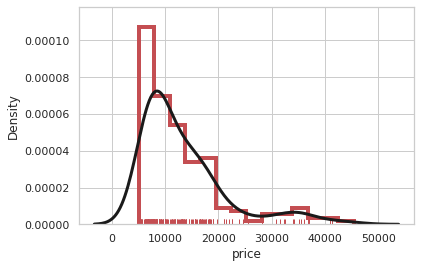

In [2432]:
#Visualizing the distribution before removing outlier

plt=sns.distplot(automobile_percentile['price'], rug =True, rug_kws={"color":"r"},
             kde_kws={"color":"k","lw":3},
             hist_kws={"histtype":"step", "linewidth": 4,
                       "alpha":1,"color":"r"})

### After Removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



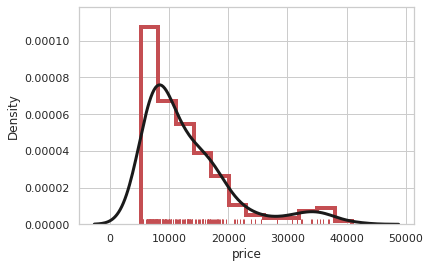

In [2433]:
#Visualizingdistribution after removing outlier using percentile method
plt2=sns.distplot(automobile_percentile2['price'],
             rug =True, rug_kws={"color":"r"},
             kde_kws={"color":"k","lw":3},
             hist_kws={"histtype":"step", "linewidth": 4,
                       "alpha":1,"color":"r"})

### Before Removing Outlier

In [2434]:
automobile_percentile['price'].describe()

count      194.000000
mean     13275.221649
std       8048.584426
min       5118.000000
25%       7747.250000
50%      10320.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

### After Removing Outlier

In [2435]:
automobile_percentile2['price'].describe()

count      190.000000
mean     13044.257895
std       7468.301645
min       5195.000000
25%       7775.000000
50%      10320.000000
75%      16482.500000
max      40960.000000
Name: price, dtype: float64

Findings: 

1. After removing the outlier the shape of the dataframe changed from 194 to 190 rows
2. we can see that the median remains the same, but there is a difference in mean and maximum value.
3. We can also see a clear change of these value change in the distribution plot. 
4. There is a change in the distribution of the data near both the peak values

###**Overall, It is evident that when outlier is removed using percentile method, the distribution of the data changes.**

## Using MinMax Scaler to Normalize the Data

*Normalization of data is essential to convert the numeric data of various ranges to uniform 0 to 1 range. This way once the data is standardized across the dataframe it is easier to perform the analysis*

In [2436]:
#creating a copy of the data so that original dataframe remains same
automobile_scaler = automobile_clean.copy(deep=True)

In [2437]:
#We are importng minmax scaler from sklearn.preprocessing to perform scaling and transformation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
automobile_scaler[['symboling', 'normalized-losses',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']] = scaler.fit_transform(automobile_clean[['symboling', 'normalized-losses',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']])

In [2438]:
automobile_scaler.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.567488,0.290537,0.355139,0.492736,0.467939,0.494294,0.415018,0.249335,0.564951,0.563856,0.193325,0.235263,0.398311,0.338123,0.386829,0.201676
std,0.250004,0.167023,0.176122,0.184166,0.179189,0.203544,0.202699,0.157725,0.193805,0.149932,0.243013,0.165052,0.194873,0.181384,0.180912,0.196092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.188482,0.230321,0.379851,0.316667,0.350000,0.254849,0.135849,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066121
50%,0.600000,0.261780,0.303207,0.479104,0.433333,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.135966
75%,0.800000,0.376963,0.460641,0.629851,0.550000,0.641667,0.564585,0.309434,0.746429,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282558
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Before Normalization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



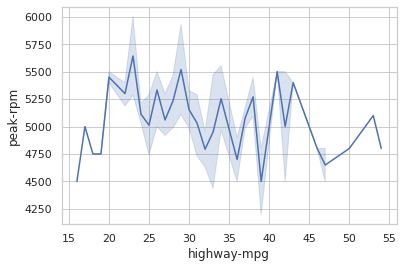

In [2439]:
sns.lineplot(automobile_clean['highway-mpg'],automobile_clean['peak-rpm'])

###After Normalization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



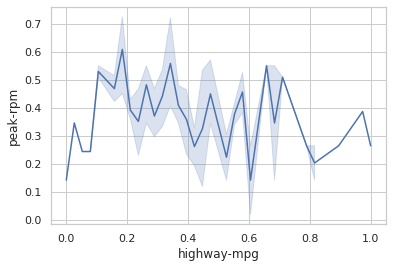

In [2440]:
sns.lineplot(automobile_scaler['highway-mpg'],automobile_scaler['peak-rpm'])

Findings: After Normalizing the data the shape of the dataframe did not change. The shape of the plot remains unchanged

###Before Normalization

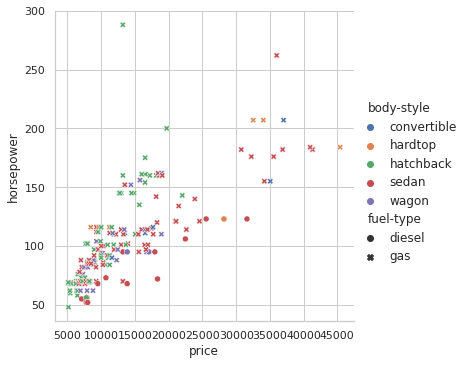

In [2441]:
sns.relplot(x=automobile_clean['price'], y = automobile_clean['horsepower'],hue=automobile_clean['body-style'],style=automobile_clean['fuel-type'])

###After Normalization

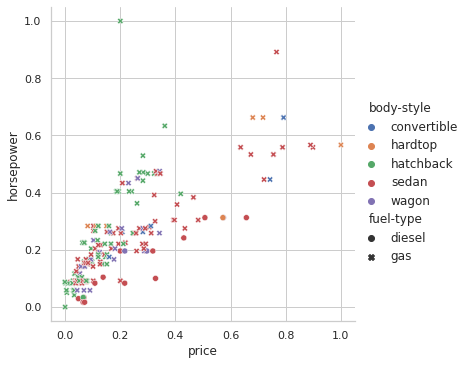

In [2442]:
sns.relplot(x=automobile_scaler['price'], y = automobile_scaler['horsepower'],hue=automobile_scaler['body-style'],style=automobile_scaler['fuel-type'])

Findings: After Normalizing the data the shape of the dataframe did not change

###Before Normalization

In [2443]:
#checking the distribution before normalization
automobile_clean["price"].describe()

count      203.000000
mean     13241.911330
std       7898.957924
min       5118.000000
25%       7781.500000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [2444]:
#checking the distribution after normalization
automobile_scaler["price"].describe()

count    203.000000
mean       0.201676
std        0.196092
min        0.000000
25%        0.066121
50%        0.135966
75%        0.282558
max        1.000000
Name: price, dtype: float64

####**It is evident that when we are normalizing the data, the skewness or the appearance of the variable is not changed. Only the values are changed to respective values from 0 to 1. say minimum value assigned to 0 and maximum value assigned to 1**

#Squareroot Tranformation

*Squareroot transformation basically changes the sqewness of the data. Mostly right skewed data to comparitively normally distributed data*

In [2445]:
#copying the dataframe to transform dataframe
#performing squareroot trasnformation to price,city-mpg,highway-rpm and horsepower variables
#adding these transformed variables to automobile trasnform dataframe
automobile_transform=automobile_clean.copy(deep=True)
transform_price= automobile_clean["price"].transform([np.sqrt])
transform_horsepower= automobile_clean["horsepower"].transform([np.sqrt])
automobile_transform['horsepower']=transform_horsepower
automobile_transform['price']=transform_price
transform_peakrpm= automobile_clean["peak-rpm"].transform([np.sqrt])
transform_citympg= automobile_clean["city-mpg"].transform([np.sqrt])
automobile_transform['city-mpg']=transform_citympg
automobile_transform['peak-rpm']=transform_peakrpm

###Before Transformation

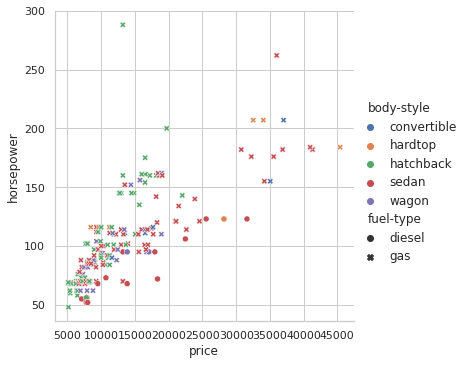

In [2446]:
#creating a scatterplot to see the relationship between price and horsepower. The added features of putting bodystyle in color and fuel type to shape of the plot adds dimension.
sns.relplot(x=automobile_clean['price'], y = automobile_clean['horsepower'],hue=automobile_clean['body-style'],style=automobile_clean['fuel-type'])

###After Transformation

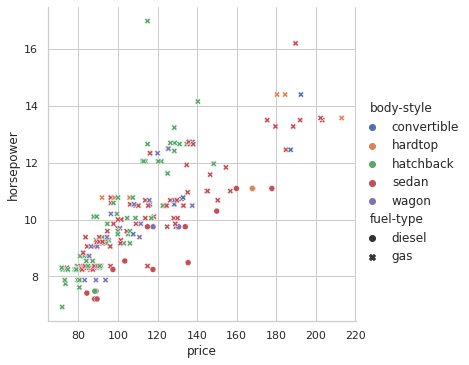

In [2447]:
#creating a scatterplot to see the relationship between price and horsepower. The added features of putting bodystyle in color and fuel type to shape of the plot adds dimension.
sns.relplot(x=automobile_transform['price'], y = automobile_transform['horsepower'],hue=automobile_transform['body-style'],style=automobile_transform['fuel-type'])

Findings: 

 We can clearly see there is a change in the distribution and also the price reduce to smaller value

###Before Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



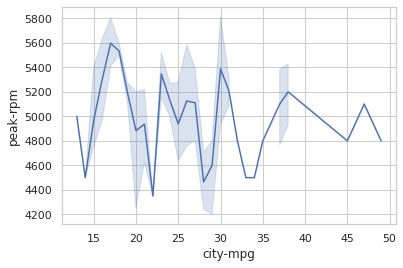

In [2448]:
#creating a line plot between city mpg and peak rpm.
sns.lineplot(automobile_clean['city-mpg'],automobile_clean['peak-rpm'])

###After Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



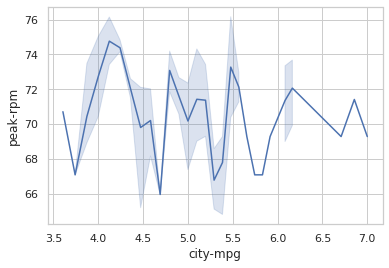

In [2449]:
#creating a line plot between transformed city mpg and peak rpm.
sns.lineplot(automobile_transform['city-mpg'],automobile_transform['peak-rpm'])

Findings: 
We can clearly see there is a change in the distribution, obvious difference can be seen towards the end of the plot and also the city-mpg value reduce to smaller valueFindings.

###Before Transformation

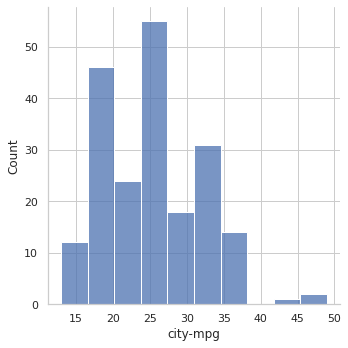

In [2450]:
#The distribution plot shows the city mpg distribution before transformation
sns.displot(automobile_clean['city-mpg'])

###After Transformation

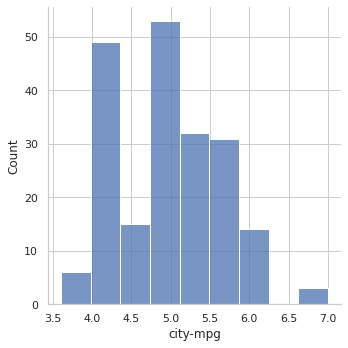

In [2451]:
#The distribution plot shows the city mpg distribution with values after squareroot transformation
sns.displot(automobile_transform['city-mpg'])

Findings: 
We can clearly see there is a change in the distribution, obvious difference can be seen towards the end of the plot.

####**It is evident that when we Squareroot transformation is performed on the data, the skewness and the appearance of the variable changed**

####**We can also see that the values are converted into smaller values than that of the original ones. I assume this is because of the square root transformation performed on the values**

####Thank you for Dr.Lixin Fu giving me the opportunity to learn the concepts 

#Exporting the file to PDF

In [2473]:
#code used to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2477]:
#code used to convert file to PDF
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('thiyagarajan1_iaf603_assignment1.ipynb')